In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from glob import glob
import os
import re

/mnt/home/shahban1/potentiation/potenv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Read data and create dataframe

rdirs = [
    '/mnt/scratch/shahban1/potentiation_round3/NSGA2/',
    '/mnt/scratch/shahban1/potentiation_round3/lex_std/'
]

def parse_filename(filename):
    pattern = r"alg-(?P<alg>.+)_S-(?P<S>\d+)_N-(?P<N>\d+)_K-(?P<K>\d+)_emprand-(?P<emprand>\d+)_seed-(?P<seed>\d+)"
    match = re.search(pattern, filename)
    if match:
        return match.groupdict()
    return {}

all_data = []
for rdir in rdirs:
    for fname in os.listdir(rdir):
        if fname.endswith(".npz"):
            info = parse_filename(fname)
            if info:
                data = np.load(os.path.join(rdir, fname))
                best_fitness = data["best_fitness"]
                F = data["F"]
                scores = np.max(F, axis=0)
                
                N = int(info["N"])
                coverage = np.sum(scores[:N] >= best_fitness[:N])

                entry = {
                    **info,
                    "scores": scores,
                    "coverage": coverage,
                    "best_fitness": best_fitness,
                }
                all_data.append(entry)

all_data = pd.DataFrame(all_data)
for col in ["S", "N", "K", "emprand", "seed"]:
    all_data[col] = all_data[col].astype(int)

all_data


,alg,S,N,K,emprand,seed,scores,coverage,best_fitness
0,NSGA2,100,100,8,13,12092,"[0.9928038602229208, 0.9885859077330679, 0.999...",43,"[0.9936058735474944, 0.9969009226188064, 0.999..."
1,NSGA2,100,100,8,13,4866,"[0.9936058735474944, 0.9820457843597978, 0.999...",55,"[0.9936058735474944, 0.9969009226188064, 0.999..."
2,NSGA2,100,100,8,13,28699,"[0.9936058735474944, 0.9885859077330679, 0.999...",57,"[0.9936058735474944, 0.9969009226188064, 0.999..."
3,NSGA2,100,100,8,13,1318,"[0.9928038602229208, 0.9969009226188064, 0.996...",46,"[0.9936058735474944, 0.9969009226188064, 0.999..."
4,NSGA2,100,100,8,13,6933,"[0.9928038602229208, 0.9969009226188064, 0.999...",55,"[0.9936058735474944, 0.9969009226188064, 0.999..."
5,NSGA2,100,100,8,13,27690,"[0.9936058735474944, 0.9969009226188064, 0.996...",46,"[0.9936058735474944, 0.9969009226188064, 0.999..."
6,NSGA2,100,100,8,13,8233,"[0.9928038602229208, 0.9876172558870167, 0.999...",46,"[0.9936058735474944, 0.9969009226188064, 0.999..."
7,NSGA2,100,100,8,13,29756,"[0.9928038602229208, 0.9885859077330679, 0.999...",40,"[0.9936058735474944, 0.9969009226188064, 0.999..."
8,NSGA2,100,100,8,13,29198,"[0.9936058735474944, 0.9969009226188064, 0.986...",50,"[0.9936058735474944, 0.9969009226188064, 0.999..."
9,NSGA2,100,100,8,13,24481,"[0.9936058735474944, 0.9594407165423036, 0.999...",58,"[0.9936058735474944, 0.9969009226188064, 0.999..."


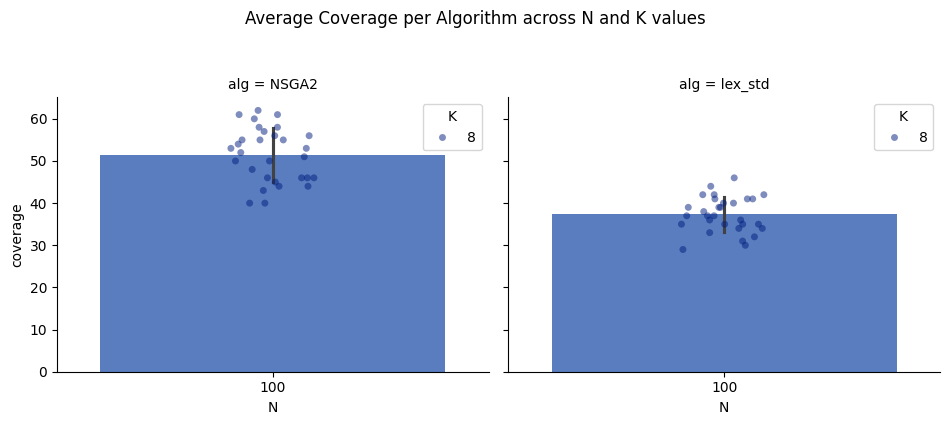

In [3]:

# Plot fitness (coverage) for each algorithm, N and K

# avg_coverage = all_data.groupby(["alg", "N", "K"])["coverage"].mean().reset_index()
# avg_coverage = avg_coverage.sort_values(["alg", "N", "K"])

plot_data = all_data.groupby(["alg", "N", "K"])["coverage"]

g = sns.catplot(
    data=all_data,
    x="N", y="coverage", hue="K",
    col="alg", kind="bar", palette="muted",
    height=4, aspect=1.2, errorbar="sd", legend=False
)

for ax, alg in zip(g.axes.flat, all_data['alg'].unique()):
    subset = all_data[all_data['alg'] == alg]
    sns.stripplot(
        data=subset, x="N", y="coverage", hue="K",
        dodge=True, ax=ax, alpha=0.5, jitter=True, palette="dark"
    )

# g.set_titles("{col_name}")
# g.set_axis_labels("N (objectives)")
# g._legend.set_title("K")
plt.suptitle("Average Coverage per Algorithm across N and K values", y=1.05)
plt.tight_layout()
plt.show()


In [6]:
# Pick the best and worst replicates

data = all_data[(all_data['alg'] == 'lex_std') & (all_data['N'] == 100) & (all_data['K'] == 8)]
print("#replicates", len(data)) # should be equal to #replicates

best_seed = data.loc[data['coverage'].idxmax(), 'seed']
worst_seed = data.loc[data['coverage'].idxmin(), 'seed']
print(f"best_seed is {best_seed} with coverage {data.loc[data['seed'] == best_seed, 'coverage'].item()}")
print(f"worst_seed is {worst_seed} with coverage {data.loc[data['seed'] == worst_seed, 'coverage'].item()}")


#replicates 30
best_seed is 26311 with coverage 46
worst_seed is 32400 with coverage 29


In [7]:
# Replays

rep_dirs = ["/mnt/scratch/shahban1/potentiation_round3/NSGA2/replays",
            "/mnt/scratch/shahban1/potentiation_round3/lex_std/replays"]

def parse_filename(filename):
    pattern = r"alg-(?P<alg>.+)_S-(?P<S>\d+)_N-(?P<N>\d+)_K-(?P<K>\d+)_emprand-(?P<emprand>\d+)_seed_(?P<seed>\d+)_replaySeed-(?P<replaySeed>\d+)_replayGen_(?P<replayGen>\d+).npz"
    match = re.search(pattern, filename)
    if match:
        return match.groupdict()
    return {}

all_replay_data = []
for rdir in rep_dirs:
    for fname in os.listdir(rdir):
        if fname.endswith(".npz"):
            info = parse_filename(fname)
            if info:
                data = np.load(os.path.join(rdir, fname))
                best_fitness = data["best_fitness"]
                F = data["F"]
                scores = np.max(F, axis=0)
                
                N = int(info["N"])
                coverage = np.sum(scores[:N] >= best_fitness[:N])

                entry = {
                    **info,
                    "scores": scores,
                    "coverage": coverage,
                    "best_fitness": best_fitness,
                }
                all_replay_data.append(entry)

all_replay_data = pd.DataFrame(all_replay_data)
for col in ["S", "N", "K", "emprand", "seed", "replayGen"]:
    all_replay_data[col] = all_replay_data[col].astype(int)
all_replay_data

,alg,S,N,K,emprand,seed,replaySeed,replayGen,scores,coverage,best_fitness
0,NSGA2,100,100,8,13,15860,2952,50,"[0.9730673362500966, 0.9885859077330679, 0.999...",53,"[0.9936058735474944, 0.9969009226188064, 0.999..."
1,NSGA2,100,100,8,13,15860,4550,600,"[0.9928038602229208, 0.9969009226188064, 0.999...",51,"[0.9936058735474944, 0.9969009226188064, 0.999..."
2,NSGA2,100,100,8,13,15860,5785,750,"[0.9917136677540839, 0.9885859077330679, 0.999...",58,"[0.9936058735474944, 0.9969009226188064, 0.999..."
3,NSGA2,100,100,8,13,15860,2036,950,"[0.9936058735474944, 0.9820457843597978, 0.996...",62,"[0.9936058735474944, 0.9969009226188064, 0.999..."
4,NSGA2,100,100,8,13,15860,3689,550,"[0.9919953290373087, 0.9885859077330679, 0.981...",44,"[0.9936058735474944, 0.9969009226188064, 0.999..."
...,...,...,...,...,...,...,...,...,...,...,...
1195,lex_std,100,100,8,13,26311,5397,950,"[0.967687908327207, 0.9969009226188064, 0.9967...",45,"[0.9936058735474944, 0.9969009226188064, 0.999..."
1196,lex_std,100,100,8,13,26311,5397,850,"[0.9936058735474944, 0.9876172558870167, 0.999...",41,"[0.9936058735474944, 0.9969009226188064, 0.999..."
1197,lex_std,100,100,8,13,26311,6230,550,"[0.9917136677540839, 0.9820457843597978, 0.963...",25,"[0.9936058735474944, 0.9969009226188064, 0.999..."
1198,lex_std,100,100,8,13,26311,4438,700,"[0.9919953290373087, 0.9969009226188064, 0.999...",34,"[0.9936058735474944, 0.9969009226188064, 0.999..."


/tmp/ipykernel_2896350/1951951352.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[0].boxplot(nsga2_data, labels=nsga2_labels)
/tmp/ipykernel_2896350/1951951352.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1].boxplot(lex_data, labels=lex_labels)


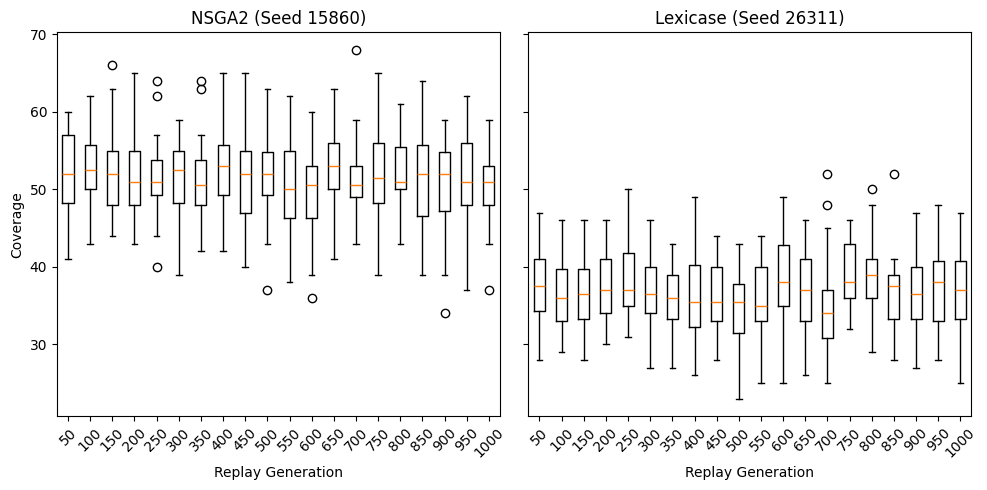

In [17]:

replay_data_NSGA2 = all_replay_data[(all_replay_data['alg'] == 'NSGA2') & (all_replay_data['seed'] == 15860)]
replay_data_lex = all_replay_data[(all_replay_data['alg'] == 'lex_std') & (all_replay_data['seed'] == 26311)]

def get_boxplot_data(df):
    box_data = []
    labels = []
    for gen in sorted(df['replayGen'].unique()):
        coverage_vals = df[df['replayGen'] == gen]['coverage'].values
        box_data.append(coverage_vals)
        labels.append(f'{gen}')
    return box_data, labels

nsga2_data, nsga2_labels = get_boxplot_data(replay_data_NSGA2)
lex_data, lex_labels = get_boxplot_data(replay_data_lex)
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharey=True)

# NSGA2
axes[0].boxplot(nsga2_data, labels=nsga2_labels)
axes[0].set_title("NSGA2 (Seed 15860)")
axes[0].set_xlabel("Replay Generation")
axes[0].set_ylabel("Coverage")
axes[0].set_xticklabels(lex_labels, rotation=45)

# Lexicase
axes[1].boxplot(lex_data, labels=lex_labels)
axes[1].set_title("Lexicase (Seed 26311)")
axes[1].set_xlabel("Replay Generation")
axes[1].set_xticklabels(lex_labels, rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
# Check that snapshot at gen 1000 matches final population
algorithm = "NSGA2"
N=100
K=8
seed=6654

final_pop = np.load(f"/mnt/scratch/shahban1/potentiation_round2/{algorithm}/alg-{algorithm}_S-100_N-{N}_K-{K}_emprand-13_seed-{seed}.npz")
final_snapshot = np.load(f"/mnt/scratch/shahban1/potentiation_round2/{algorithm}/snapshots/alg-{algorithm}_S-100_N-{N}_K-{K}_emprand-13_seed-{seed}_snapshot.npz")

final_snapshot["init_pop_1000"] == final_pop["X"]

In [27]:
init_data = np.load('/mnt/scratch/shahban1/potentiation_round2/NSGA2/snapshots/alg-NSGA2_S-100_N-50_K-8_emprand-13_seed-6654_snapshot.npz')
init_data['init_pop_50']

array([[ True, False,  True, ...,  True,  True,  True],
       [ True,  True, False, ..., False, False, False],
       [False, False,  True, ..., False, False,  True],
       ...,
       [ True,  True,  True, ...,  True,  True, False],
       [False,  True, False, ..., False,  True, False],
       [False, False, False, ...,  True,  True, False]], shape=(100, 50))

In [20]:
data

,alg,S,N,K,emprand,seed,scores,coverage,best_fitness
8,NSGA2,100,100,8,13,12092,"[0.9928038602229208, 0.9885859077330679, 0.996...",51,"[0.9936058735474944, 0.9969009226188064, 0.999..."
12,NSGA2,100,100,8,13,4866,"[0.9928038602229208, 0.9870854788459837, 0.999...",56,"[0.9936058735474944, 0.9969009226188064, 0.999..."
43,NSGA2,100,100,8,13,28699,"[0.9928038602229208, 0.9969009226188064, 0.999...",49,"[0.9936058735474944, 0.9969009226188064, 0.999..."
48,NSGA2,100,100,8,13,1318,"[0.9928038602229208, 0.9969009226188064, 0.999...",48,"[0.9936058735474944, 0.9969009226188064, 0.999..."
54,NSGA2,100,100,8,13,6933,"[0.9928038602229208, 0.9969009226188064, 0.999...",46,"[0.9936058735474944, 0.9969009226188064, 0.999..."
62,NSGA2,100,100,8,13,27690,"[0.9936058735474944, 0.9969009226188064, 0.973...",47,"[0.9936058735474944, 0.9969009226188064, 0.999..."
63,NSGA2,100,100,8,13,8233,"[0.9936058735474944, 0.9870854788459837, 0.999...",52,"[0.9936058735474944, 0.9969009226188064, 0.999..."
64,NSGA2,100,100,8,13,29756,"[0.9928038602229208, 0.9969009226188064, 0.999...",50,"[0.9936058735474944, 0.9969009226188064, 0.999..."
67,NSGA2,100,100,8,13,29198,"[0.9936058735474944, 0.9870854788459837, 0.981...",55,"[0.9936058735474944, 0.9969009226188064, 0.999..."
87,NSGA2,100,100,8,13,24481,"[0.9936058735474944, 0.9885859077330679, 0.996...",48,"[0.9936058735474944, 0.9969009226188064, 0.999..."


In [29]:
test = np.load('/mnt/scratch/shahban1/potentiation_round2/NSGA2/replays/replay-32400_alg-NSGA2_S-100_N-100_K-8_emprand-13_seed-0.npz')
test['F']

test2 = np.load('/mnt/scratch/shahban1/potentiation_round2/NSGA2/alg-NSGA2_S-100_N-100_K-8_emprand-13_seed-32400.npz')
test2

array([[0.77192694, 0.94218545, 0.17768615, ..., 0.5440524 , 0.36919133,
        0.52388521],
       [0.61477972, 0.69926904, 0.84924631, ..., 0.49703237, 0.46747031,
        0.42583813],
       [0.84269784, 0.24870538, 0.99919051, ..., 0.03263327, 0.179029  ,
        0.07618455],
       ...,
       [0.15920601, 0.7957477 , 0.29826676, ..., 0.1533049 , 0.11172897,
        0.14348597],
       [0.8648197 , 0.49197815, 0.25351263, ..., 0.09946437, 0.84445801,
        0.9162812 ],
       [0.24863304, 0.24559895, 0.90567402, ..., 0.21602514, 0.07133437,
        0.07548319]], shape=(100, 100))

0.9890406145714223


NameError: name 'N' is not defined

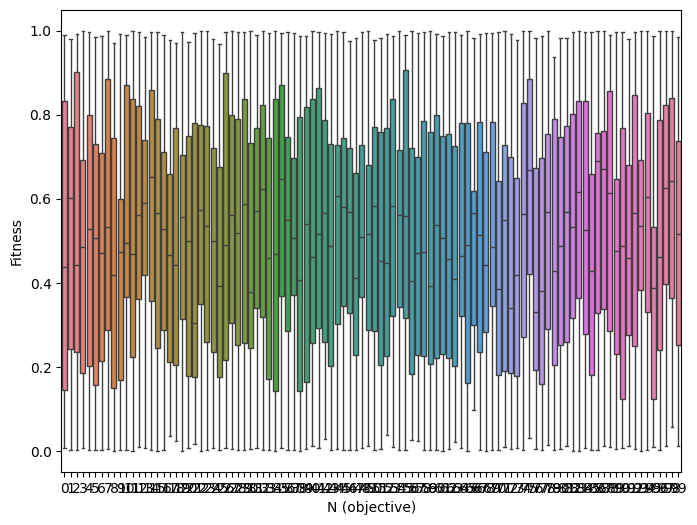

In [9]:
# import matplotlib.pyplot as plt

df = pd.DataFrame(data["F"])

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df)

means = df.mean()
#plt.scatter(range(len(means)), means, color='black', marker='o', label='Mean')
#plt.scatter(range(len(best_fitness)), best_fitness, color='red', marker='*', s=150, label='Best Fitness')

# Labels and title
plt.xlabel("N (objective)")
plt.ylabel("Fitness")
plt.title(f"Fitness of each objective in the final population\n N = {N}, K = {K}")
plt.legend()
plt.show()

In [11]:

folder = "/mnt/scratch/shahban1/potentiation_round1/lex_std/"

for fname in os.listdir(folder):
    if fname.endswith(".npz") and "alg-lex_std_" in fname:
        new_fname = fname.replace("alg-lex_std_", "alg-lexstd_")
        old_path = os.path.join(folder, fname)
        new_path = os.path.join(folder, new_fname)
        
        # Rename the file
        os.rename(old_path, new_path)
        print(f"Renamed: {fname} → {new_fname}")


Renamed: alg-lex_std_S-100_N-50_K-8_emprand-13_seed-18313.npz → alg-lexstd_S-100_N-50_K-8_emprand-13_seed-18313.npz
Renamed: alg-lex_std_S-100_N-50_K-8_emprand-13_seed-10132.npz → alg-lexstd_S-100_N-50_K-8_emprand-13_seed-10132.npz
Renamed: alg-lex_std_S-100_N-50_K-10_emprand-13_seed-8233.npz → alg-lexstd_S-100_N-50_K-10_emprand-13_seed-8233.npz
Renamed: alg-lex_std_S-100_N-100_K-8_emprand-13_seed-24481.npz → alg-lexstd_S-100_N-100_K-8_emprand-13_seed-24481.npz
Renamed: alg-lex_std_S-100_N-50_K-12_emprand-13_seed-20300.npz → alg-lexstd_S-100_N-50_K-12_emprand-13_seed-20300.npz
Renamed: alg-lex_std_S-100_N-100_K-12_emprand-13_seed-24481.npz → alg-lexstd_S-100_N-100_K-12_emprand-13_seed-24481.npz
Renamed: alg-lex_std_S-100_N-50_K-8_emprand-13_seed-14289.npz → alg-lexstd_S-100_N-50_K-8_emprand-13_seed-14289.npz
Renamed: alg-lex_std_S-100_N-50_K-8_emprand-13_seed-4719.npz → alg-lexstd_S-100_N-50_K-8_emprand-13_seed-4719.npz
Renamed: alg-lex_std_S-100_N-50_K-10_emprand-13_seed-12092.npz → a

In [20]:
folderr = "/mnt/scratch/shahban1/potentiation_round1"

pattern = r"alg-(?P<alg>.+)_S-(?P<S>\d+)_K-(?P<K>\d+)_N-(?P<N>\d+)_seed-(?P<seed>\d+)_\d+.out"
count = 0
for f in os.listdir(folderr):
    if f.endswith(".out"):
        match = re.search(pattern, f)
        if match:
            K = int(match.group("K"))
            if K == 6:
                #os.remove(os.path.join(folderr, f))
                count += 1
                print(f"{f} removed")
print(count)

alg-NSGA2_S-100_K-6_N-100_seed-14289_53668638.out removed
alg-NSGA2_S-100_K-6_N-100_seed-20300_53668644.out removed
alg-NSGA2_S-100_K-6_N-50_seed-4866_53668690.out removed
alg-NSGA2_S-100_K-6_N-100_seed-18313_53668642.out removed
alg-lex_std_S-100_K-6_N-100_seed-12669_53668700.out removed
alg-lex_std_S-100_K-6_N-50_seed-20300_53668739.out removed
alg-lex_std_S-100_K-6_N-100_seed-27690_53668713.out removed
alg-NSGA2_S-100_K-6_N-50_seed-10132_53668661.out removed
alg-lex_std_S-100_K-6_N-100_seed-32400_53668718.out removed
alg-lex_std_S-100_K-6_N-50_seed-26311_53668742.out removed
alg-lex_std_S-100_K-6_N-100_seed-14724_53668704.out removed
alg-lex_std_S-100_K-6_N-100_seed-4866_53668720.out removed
alg-lex_std_S-100_K-6_N-100_seed-6832_53668722.out removed
alg-NSGA2_S-100_K-6_N-50_seed-13352_53668667.out removed
alg-lex_std_S-100_K-6_N-50_seed-24481_53668741.out removed
alg-lex_std_S-100_K-6_N-100_seed-13352_53668702.out removed
alg-lex_std_S-100_K-6_N-100_seed-10197_53668697.out removed
a